In [4]:
import time

import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver as wd

In [5]:
## CHECK START TIME
start = time.time()       # To cacluate the overall time

driver = wd.Chrome()

# INPUT YOUTUBE URL
url = "https://www.youtube.com/post/UgkxL-41MTrFcU_QhMGJl-uU2BAWwHbNGd6O"       # URL of the youtube video
driver.get(url)

last_page_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1.0)       # need at least 1 second to load the page
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight")

    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height

html_source = driver.page_source
driver.close()

In [120]:
# HTML 태크 크롤링 작업
soup = BeautifulSoup(html_source, "lxml")

# <div id="header-author" class="style-scope ytd-comment-renderer">
    #     <h3 class="style-scope ytd-comment-renderer">
    #       <a id="author-text" class="yt-simple-endpoint style-scope ytd-comment-renderer" href="/channel/UCOA39r7z2EHBSA2llS9-wkQ">
    #         <yt-formatted-string respect-lang-dir="" class=" style-scope ytd-comment-renderer style-scope ytd-comment-renderer">@user-sh5mb3se4v</yt-formatted-string>
    #       </a>
    #     </h3>
    #     <span id="author-comment-badge" class="style-scope ytd-comment-renderer" hidden=""></span>
    #     <span id="sponsor-comment-badge" class="style-scope ytd-comment-renderer" hidden=""></span>
    #     <yt-formatted-string class="published-time-text style-scope ytd-comment-renderer" link-inherit-color="" has-link-only_=""><a class="yt-simple-endpoint style-scope yt-formatted-string" spellcheck="false" href="/channel/UC7Xwa6p0x1lp8X2IiO8V2_Q/community?lc=UgxyEDoBrS4LdxgI0w14AaABAg&amp;lb=UgkxL-41MTrFcU_QhMGJl-uU2BAWwHbNGd6O" dir="auto">1일 전</a></yt-formatted-string>
    #     <span id="sponsors-only-badge" class="style-scope ytd-comment-renderer" hidden=""></span>
    #   </div>

youtube_user_IDs = soup.select("div#header-author > h3 > #author-text > yt-formatted-string")
youtube_comments = soup.select("yt-formatted-string#content-text")

In [121]:
str_youtube_userIDs = []   # user ID list
str_youtube_comments = []  # user comment list

# REPLACE DATA
for i in range(len(youtube_user_IDs)):
    str_tmp = str(youtube_user_IDs[i].text)
    # str_tmp = str_tmp.replace('\n', '')
    str_tmp = str_tmp.replace('\t', '')
    str_tmp = str_tmp.replace('   ','')
    str_youtube_userIDs.append(str_tmp)

    str_tmp = str(youtube_comments[i].text)
    # str_tmp = str_tmp.replace('\n', '')
    str_tmp = str_tmp.replace('\t', '')
    str_tmp = str_tmp.replace('   ','')
    str_youtube_comments.append(str_tmp)

In [122]:
# MODIFY VIEW FORMAT
pd_data = {"ID":str_youtube_userIDs, "comment":str_youtube_comments}
youtube_pd = pd.DataFrame(pd_data)

In [123]:
# print the result pd
print(youtube_pd)

                     ID                                            comment
0    @maplestory_hamgun  23년을 마무리하며 진행되는 『햄군님의 햄생역전 시즌 3』\n이번 햄생역전 시즌3는...
1      @user-sh5mb3se4v           ※ 이벤트 참여 댓글 양식 예시\n1. 햄님 / 리부트 1서버\n2. M
2            @manduck-O  1. 굽엄 / 리부트 2서버\n2. C\n\n여름 6차 하이퍼버닝 이벤트로 리부트를...
3            @acura2891  1. 근본김진영 / 리부트 2\n2. C\n\n끝없는 질문공격에도 항상 답변을 잘해...
4      @user-ph3oy5dk9x  1. 아크비숲 / 리부트 1 서버\n2. C\n\n\n\n메이플을 리부트로 처음 접...
..                  ...                                                ...
713    @user-jk6rq5xx8p                                  아이브liz/리부트 1서버\nH
714    @user-ox6uu2ki7o                                     조선제일검마/리부트2\nC
715          @qjh-yv9ds                                      금붕어큐큐 /크로아\nP
716    @user-qi9wp2vo9w                                    1. Rumikr1\n2.M
717    @user-qc6br7tj2z                                        새말역/리부트1\nH

[718 rows x 2 columns]


In [60]:
# WRITE TO EXCEL
youtube_pd.to_excel(r"C:\Users\user\Desktop\KAIST\miniproject\youtube_comment_crawling\data1.xlsx", sheet_name="sheet1", index=True)
print("Running Time : ", time.time() - start)       # print the running time

Running Time :  1795.6477432250977


In [136]:
alphabet = []
error = []

for i in range(2, len(youtube_pd)):
    try:
        temp = youtube_pd['comment'][i].split('\n')[1] # 2. C
        try:
            temp = temp.split('.')[1] # C
            temp = temp.replace(' ', '') # space remove
            temp = temp[0] # first letter only
            temp = temp.upper() # upper case
            alphabet.append(temp)
        except:
            if temp.upper() == 'M' or temp.upper() == 'H' or temp.upper() == 'P' or temp.upper() == 'C':
                alphabet.append(temp.upper())
            elif temp.split(' ')[1].upper() == 'M' or temp.split(' ')[1].upper() == 'H' or temp.split(' ')[1].upper() == 'P' or temp.split(' ')[1].upper() == 'C':
                alphabet.append(temp.split(' ')[1].upper())
            elif "상자" in temp:
                temp = temp.replace('상자', '')
                temp = temp.upper()
                alphabet.append(temp)
            else:
                print(i, temp)
                print("상자" in temp)
                error.append(temp)
    except:
        print(i, youtube_pd['comment'][i])

pd_data_alp = {"alphabet":alphabet}
youtube_pd_alp = pd.DataFrame(pd_data_alp)

310 쁘얏/리부트1
상자C

젭알...ㅜ.ㅜ
492 1.아델유이즈/리부트1
2C
615 똥마렵누
667 주로닝 / 리부트1서버
C상자
682 1. 랑눈 / 리부트1서버

2. H


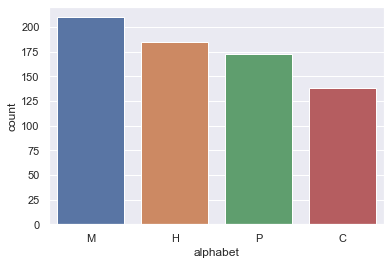

In [138]:
# draw a graph of alphabet frequency
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="alphabet", data=youtube_pd_alp, order=['M', 'H', 'P', 'C'])
plt.show()

In [139]:
# count the number of each alphabet
from collections import Counter
print(Counter(alphabet))

Counter({'M': 210, 'H': 185, 'P': 173, 'C': 138, 'S': 1, 'B': 1, 'L': 1, 'E': 1, 'R': 1})


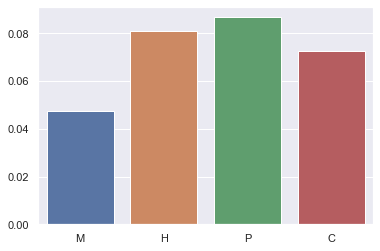

In [140]:
# M is worth 10 points but only 1 is selected
# H is worth 5 points but only 3 are selected
# P is worth 3 points but only 5 are selected
# C is worth 1 points but only 10 are selected

# expected value
M = 10*(1/Counter(alphabet)['M'])
H = 5*(3/Counter(alphabet)['H'])
P = 3*(5/Counter(alphabet)['P'])
C = 1*(10/Counter(alphabet)['C'])

# draw a graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.barplot(x=["M", "H", "P", "C"], y=[M, H, P, C])
plt.show()

In [137]:
## WRITE TO EXCEL
youtube_pd_alp.to_excel(r"C:\Users\user\Desktop\KAIST\miniproject\youtube_comment_crawling\data2.xlsx", sheet_name="sheet1", index=True)
print("Running Time : ", time.time() - start)       # print the running time

Running Time :  4255.629590988159
